In [62]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore')

#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#font = fm.FontProperties(fname=fontpath, size=9)
#mpl.font_manager.findfont(font)
plt.rcParams['font.family']='NanumBarunGothic' 


In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


# 필수 문제1 : 월별 매출액 추세

In [14]:
temp_var = sales_data
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


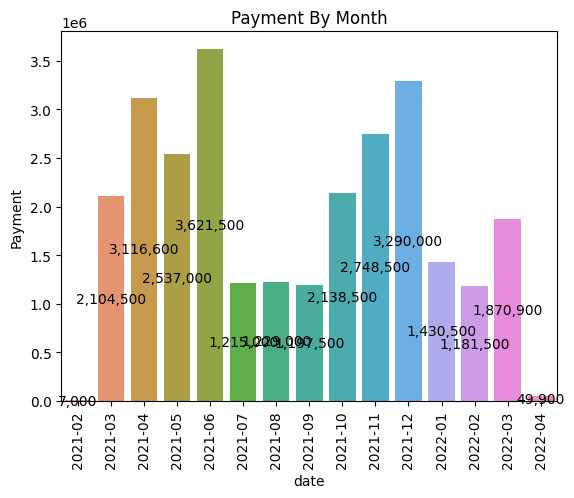

In [15]:
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',', '')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var = temp_var.astype({'결제금액':'float64'})

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var.groupby('date').agg({'결제금액':'sum'})
ax = sns.barplot(data=payment_data.reset_index(), x='date',y='결제금액')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.xticks(rotation=90)
plt.ylabel('Payment')
plt.title('Payment By Month')
plt.show()

asdf

# 필수 문제2: 가장 인기 있는 음식/음료

In [16]:
grouped = temp_var[temp_var['판매수량']==1].value_counts('상품명')
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기

items_count = grouped.sort_values(ascending=False)
items_count[:10]

상품명
김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
dtype: int64

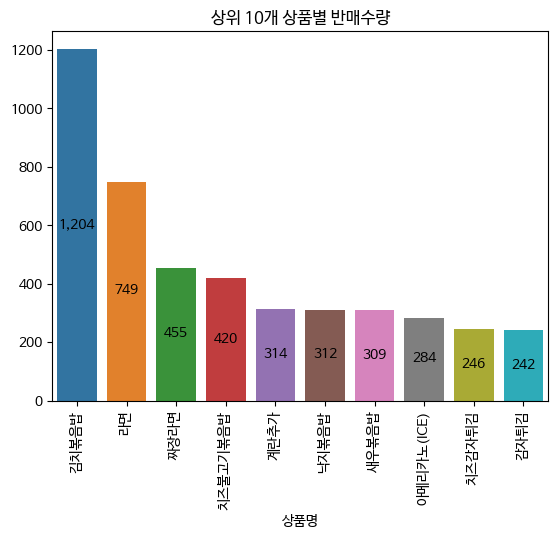

In [64]:
ax = sns.barplot(x=items_count[:10].index,y=items_count[:10])

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('상위 10개 상품별 반매수량')
plt.xticks(rotation=90)
plt.show()

김치볶음밥이 압도적으로 많이 팔렸고 그다음으로 라면, 짜장라면, 치즈불고기볶음밥이 뒤를 있는다.

In [19]:
items_payment = temp_var.groupby('상품명').sum('결제금액')
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values('결제금액', ascending=False)
items_payment[:10]

,판매수량,결제금액
상품명,,
김치볶음밥,1197,5971900.0
라면,742,2916000.0
치즈불고기볶음밥,417,2276100.0
짜장라면,453,2032500.0
낙지볶음밥,310,1699700.0
새우볶음밥,307,1529800.0
치즈감자튀김,245,1348700.0
감자튀김,242,1083800.0
아메리카노(ICE),254,936100.0


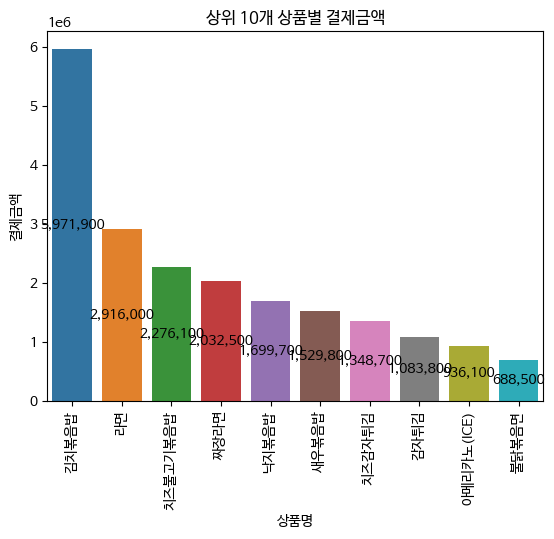

In [65]:
ax = sns.barplot(data=items_payment.reset_index()[:10], x='상품명',y='결제금액')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('상위 10개 상품별 결제금액')
plt.xticks(rotation=90)
plt.show()

결제금액도 마찬가지로 김치볶음밥이 압도적이고 라면, 치즈불고기볶음밥 짜장라면이 뒤를 있는다.

# 필수 문제3: 가장 많이 팔린 입장권 종류

In [21]:
temp_var = entry_data 
# temp_var의 금액을 숫자형태로 변환하기
temp_var = temp_var.astype({'금액':'float64'})

# temp_var의 금액을 요금제명을 기준으로 집계하기
grouped = temp_var.groupby('요금제명').sum('금액')

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = grouped.reset_index().sort_values('금액', ascending=False)[:10]
tickets

,요금제명,금액
21,한국대생 입장권(종일권),70037000.0
17,입장권(종일권),23570500.0
15,심야-조조무제한(06시까지),11600000.0
14,심야-조조무제한,6221000.0
20,한국대생 무제한 입장권,5207500.0
11,시간요금제(1시간),2665500.0
13,시간요금제(3시간),2042000.0
5,무제한 입장권,1568600.0
0,18시이후 무제한,1330500.0
18,조조무제한,693000.0


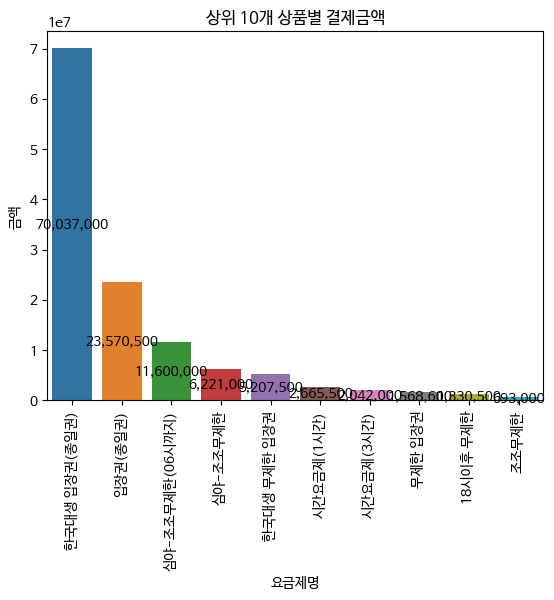

In [66]:
ax = sns.barplot(data=tickets, x='요금제명',y='금액')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.xticks(rotation=90)
plt.title('상위 10개 상품별 결제금액')
plt.xticks(rotation=90)
plt.show()

한국대생 입장권이 압도적으로 많이 팔렸다. 한국대 주변에 카페가 있는 것으로 예상된다.

# 내가 정의한문제: RFM 분석해보기

In [50]:
# 총 결제금액을 보기 위해서 entry데이터와 sales 데이터를 합쳐줍니다.
entry_data['결제일시'] = entry_data['입실']
temp = pd.merge(sales_data, entry_data, how='right', on='고객') # 고객번호를 기준으로 두 테이블을 조인해줌
temp['결제일시'] = np.where(temp['결제일시_x'].isnull(),temp['결제일시_y'] ,temp['결제일시_x']) # 결제일시를 하나로 통합
temp['Now'] = '2022-06-10' # 결제일시 마지막이 2022-06-10이다.

# Now열 값을 시간 계산을 위한 datetime으로 전환
temp['Now'] = pd.to_datetime(temp['Now'])

# sales_data의 Time_stamp열 값을 시간 계산을 위한 datetime으로 전환
temp['Time_stamp'] = pd.to_datetime(temp['결제일시'])
temp['Interval'] = temp['Now'] - temp['Time_stamp']

# 총 금액을 구하기 위해서 이름이 다른 금액과 결제금액 컬럼을 합쳐준다
temp['결제금액'] = temp['결제금액'].fillna(0) # null 값인경우 더해주기 위해 0 으로 채워주기
temp['이용금액'] = temp['금액'] + temp['결제금액'].astype('int64') #음료와 입장권 구매가 동시일때 같은 상황을 처리하기 위해 합쳐준다
RFM_data = temp.groupby(['고객']).agg({'Interval':'min','고객': 'count', '이용금액': 'sum'})
RFM_data.columns = ['Recency', 'Frequency', 'Monetary'] #이때 Frequency는 결제횟수이다.
RFM_data

,Recency,Frequency,Monetary
고객,,,
customer,89 days 07:55:00,40,230100
customer010407,152 days 11:20:00,1,7000
customer014003,104 days 03:04:00,2,12000
customer014109,235 days 13:50:00,1,2500
customer016604,200 days 23:12:00,1,5000
...,...,...,...
customer999584,175 days 23:18:00,27,255000
customer999585,232 days 07:34:00,1,7000
customer999770,379 days 01:54:00,1,5000


In [51]:
RFM_data['Recency'] = RFM_data['Recency'].astype(str).apply(lambda x: x[:3]).astype('int') # 000days -> 000으로 숫자화
# RFM_data의 R_score열을 만들고, Recency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다.
# Recency의 경우 작을수록 좋은 점수여야 함
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)
# RFM_data의 F_score열을 만들고, Frequency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1, 100)).round(2)
# RFM_data의 M_score열을 만들고, Monetary열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 

RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1, 100)).round(2)

# RFM_data에 RFM_score열을 만들고, 각 요소별 가중평균값을 할당
#  여기서 Frequency는 하루에 많이 사먹었을때도 올라가므로 Moneytary와 Recency에 더욱 중점을 주기 위해 가중평균 계산
RFM_data["RFM_score"] = ((2*RFM_data['R_score'] + RFM_data['F_score'] + 3*RFM_data['M_score'])/6).round(2)
RFM_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
고객,,,,,,,
customer,89,40,230100,95.15,1.54,1.38,32.66
customer010407,152,1,7000,79.86,1.00,1.01,27.29
customer014003,104,2,12000,91.51,1.01,1.02,31.18
customer014109,235,1,2500,59.72,1.00,1.00,20.57
customer016604,200,1,5000,68.21,1.00,1.01,23.41
...,...,...,...,...,...,...,...
customer999584,175,27,255000,74.28,1.36,1.42,25.70
customer999585,232,1,7000,60.45,1.00,1.01,20.82
customer999770,379,1,5000,24.78,1.00,1.01,8.93


In [52]:
# RFM_data에 Class열을 만들고, RFM_score와 지정한 분위값 범위에 따라 labels 값을 입력합니다
RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])
# Class가 입력된 RFM_data의 인덱스를 재정렬합니다.
RFM_data

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
고객,,,,,,,,
customer,89,40,230100,95.15,1.54,1.38,32.66,2
customer010407,152,1,7000,79.86,1.00,1.01,27.29,3
customer014003,104,2,12000,91.51,1.01,1.02,31.18,2
customer014109,235,1,2500,59.72,1.00,1.00,20.57,4
customer016604,200,1,5000,68.21,1.00,1.01,23.41,4
...,...,...,...,...,...,...,...,...
customer999584,175,27,255000,74.28,1.36,1.42,25.70,3
customer999585,232,1,7000,60.45,1.00,1.01,20.82,4
customer999770,379,1,5000,24.78,1.00,1.01,8.93,5


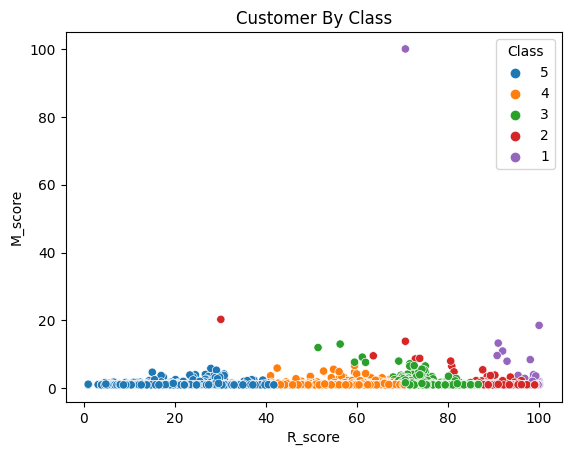

In [28]:
# R_score와 M_score를 기준으로 산포도(scatter) 그리기
sns.scatterplot(data=RFM_data, x='R_score', y='M_score', hue='Class')
plt.title('Customer By Class')
plt.show()

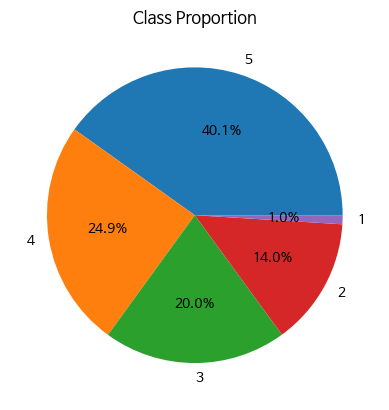

In [73]:
# RFM_data의 고객번호 값을 Class열을 기준으로 집계
temp_var = RFM_data.groupby('Class').count()
temp_var
# 집계 결과(VIP 등급별 고객 수)에 따른 파이그래프 그리기
plt.pie(temp_var['RFM_score'], labels=temp_var.index, autopct = '%1.1f%%')
plt.title('Class Proportion')
plt.show()

Class 5가 40%인데 비해 Class1은 1% 밖에 안 된다. 

In [56]:
temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)
temp_var

,Recency,Frequency,Monetary
Class,,,
5,386.8,7.4,68549.1
4,230.7,9.5,84497.9
3,166.6,19.7,177310.7
2,92.1,19.1,122031.1
1,75.6,246.3,2164877.4


Class1과 Class5간의 차이가 확실히 보인다. Class 1은 평균적으로 75일 전에 방문했고, 총 쓴 금액의 평균이 200만원이지만 Class5는 안온지 1년이 넘었고 돈도 68500원 정도 밖에 쓰지 않았다.

In [67]:
VIP_customer = RFM_data[RFM_data['Class'] == 1]
VIP_customer = VIP_customer.reset_index(drop=True)
VIP_customer.head(10) # 단골손님 리스트

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,69,2,13800,100.00,1.01,1.02,34.01,1
1,69,9,56700,100.00,1.11,1.09,34.06,1
2,69,1,8400,100.00,1.00,1.01,34.01,1
3,69,2,14900,100.00,1.01,1.02,34.01,1
4,102,600,6115000,91.99,9.27,10.99,37.70,1
5,69,4,27800,100.00,1.04,1.05,34.03,1
6,71,30,324000,99.51,1.40,1.53,34.17,1
7,107,442,5301000,90.78,7.09,9.66,36.27,1
8,69,27,312300,100.00,1.36,1.51,34.32,1
9,69,8,30000,100.00,1.10,1.05,34.04,1


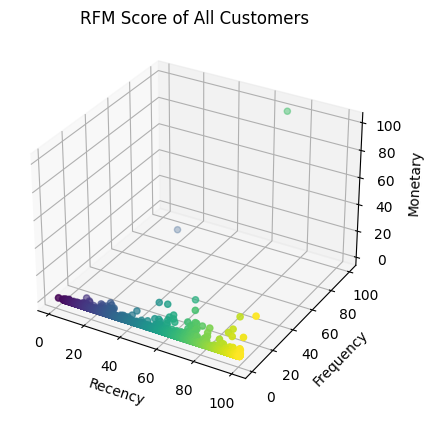

In [59]:
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()

아무래도 학교주변 스터디 카페이다 보니 학생들이 많이 방문하고, 학생들이기 때문에 결제빈도인 Frequency와 총 결제금액인 Monetary가 그다지 중요하게 나타나지는 않고 있다. 따라서 Recency를 낮추도록 즉 자주 방문하도록 하는 것이 최선의 방법이라고 생각된다. 방문을 자주하면 인기메뉴인 김치볶음밥을 서비스로 준다던지 하는 프로모션을 통하여 방문율을 높일 수 있다고 생각된다. 또는 시설을 더 좋게 만들고 홍보를 한다거나 해도 좋을 것 같다